In [234]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# load and view the dataset
data = pd.read_csv('energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [236]:
# check for null entries
data.isnull().any()

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool

In [237]:
print(data.shape)
print(data.columns)

(19735, 29)
Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [238]:
# obtain basic statistical information about the dataset
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


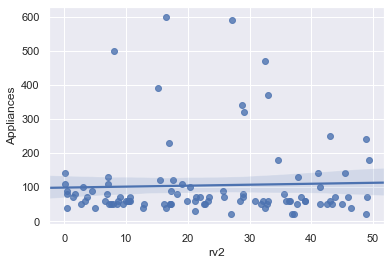

In [239]:
# selecting a sample of the dataset
sample_data = data[['rv1','rv2', 'Appliances']].sample(n=100, random_state=2)

# regression plot
sns.regplot(x='rv2', y='Appliances', data=sample_data)

In [240]:
# drop 'date & 'lights' columns from the dataset
data = data.drop(columns=['date', 'lights'])

# confirm the columns were dropped
data.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [241]:
# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
predictors = norm_data.drop(columns='Appliances')
target = norm_data['Appliances']

# confirm the target column was dropped from predictors
predictors.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [242]:
predictors.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [243]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [244]:
print(X_train.shape)
print(X_test.shape)

(13814, 26)
(5921, 26)


In [245]:
# fit a linear regression model to the dataset

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [246]:
# make prediction using fitted model
prediction = model.predict(X_test)

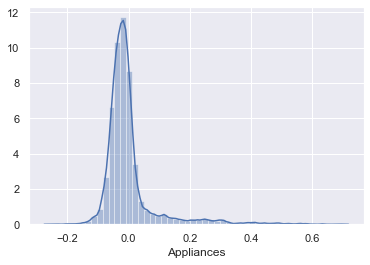

In [247]:
sns.distplot((y_test-prediction))

# Question 12

From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

In [248]:
# normalized data
x = norm_data['T2']
y = norm_data['T6']

# data spplit into train and test set
x_train_temp, x_test_temp, y_train_temp, y_test_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# fit model to data
temperature_model = LinearRegression()
temperature_model.fit(x_train_temp.values.reshape(-1,1), y_train_temp)
y_pred = temperature_model.predict(x_test_temp.values.reshape(-1,1))

# r2 score
r2 = r2_score(y_test_temp, y_pred)
print('r2 score is: {}'.format(round(r2, 2))) 

r2 score is: 0.64


# Questions 13 - 16

In [249]:
# model evaluation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# MAE score
mae = mean_absolute_error(y_test, prediction)
print('MAE score is: {}'.format(round(mae, 2)))

# R2 score
r2 = r2_score(y_test, prediction)
print('r2 score is: {}'.format(round(r2, 2)))

# RMSE score
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE score is: {}'.format(round(rmse, 3)))

# RSS score
rss = sum((y_test - prediction)**2)
print('RSS score is: {}'.format(round(rss, 2)))

MAE score is: 0.05
r2 score is: 0.15
RMSE score is: 0.088
RSS score is: 45.35


# Question 17
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [250]:
def get_weights_df(model, features, col_name):
    '''this function returns the weight of every feature'''
    
    weights = pd.Series(model.coef_, features.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    
    return weights_df

In [251]:
# Linear model weights
linear_model_weights = get_weights_df(model, X_train, 'Linear_Model_weight')

# weights from ridge regression
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')

# weights from the lasso
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

# weights from Elastic Net regression
elasticNet_weights_df = get_weights_df(elasti_reg, X_train, 'Elastic_Net_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, elasticNet_weights_df, on='Features')

In [252]:
final_weights.sort_values(by='Linear_Model_weight', ascending=True)

,Features,Linear_Model_weight,Ridge_Weight,Lasso_weight,Elastic_Net_weight
0,rv2,-6.347156e+10,0.000748,-0.000000,0.000000
1,RH_2,-4.566222e-01,-0.411071,-0.000000,-0.000000
2,T_out,-3.218423e-01,-0.262172,0.000000,0.000000
3,T2,-2.361131e-01,-0.201397,0.000000,0.021721
4,T9,-1.899177e-01,-0.188916,-0.000000,-0.048044
5,RH_8,-1.575747e-01,-0.156830,-0.000110,-0.084407
6,RH_out,-7.767868e-02,-0.054724,-0.049557,-0.038092
7,RH_7,-4.462568e-02,-0.045977,-0.000000,-0.002863
8,RH_9,-3.980029e-02,-0.041367,-0.000000,-0.000000
9,T5,-1.566246e-02,-0.019853,-0.000000,-0.000000


# Question 18
Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [253]:
# Ridge regression
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)
r_pred = ridge_reg.predict(X_test)

# RMSE score
rmse = np.sqrt(mean_squared_error(y_test, r_pred))
print('RMSE score is: {}'.format(round(rmse, 3)))

RMSE score is: 0.088


# Question 19
Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [254]:
(final_weights['Lasso_weight'] != 0).sum()

4

# Question 20
What is the new RMSE with the Lasso Regression (in 3 decimal places)? 

In [255]:
l_pred = lasso_reg.predict(X_test)

# RMSE score
rmse = np.sqrt(mean_squared_error(y_test, l_pred))
print('RMSE score is: {}'.format(round(rmse, 3)))

RMSE score is: 0.094
